In [15]:
class TNode:
  def __init__(self, data, left, right):
    self.data = data
    self.left = left
    self.right = right

In [31]:
morseTable=[('A','.-'),('B','_...'),('C','-.-.'),('D','-..'),('E','.'),('F','..-.'),('G','--.'),('H','....'),('I','..'),('J','.---'),('K','-.-'),
            ('L','.-..'),('M','--'),('N','-.'),('O','---'),('P','.--.'),('Q','--.-'),('R','.-.'),('S','...'),('T','-'),('U','..-'),('V','..-'),
            ('W','.--'),('X','-..-'),('Y','-.--'),('Z','--..')]

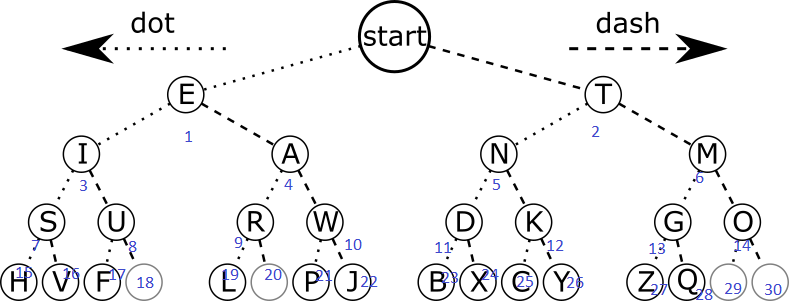

In [48]:
#왼쪽 노드: '.' , 오른쪽 노드: '-'을 이용해 모르스 부호 트리 만드는 메서드
#morseTable에 있는 모르스 부호에 따라 A~Z까지 트리를 탐색하고 탐색이 끝나는 지점의 노드 data에 
#그 모르스 부호가 나타내는 알파벳이 들어간다.
def make_morse_tree():
  root = TNode(None, None, None)
  for tp in morseTable:
    code = tp[1]
    node = root #다음 문제 탐색할때 초기화
    for c in code:
      if c == '.':
        if node.left == None: #탐색할 곳에 있어야 되는 노드가 없으면 빈 노드를 만들고 연결
          node.left = TNode(None,None,None)
        node = node.left
      elif c == '-':
        if node.right == None:
          node.right = TNode(None,None,None)
        node = node.right
  
    node.data = tp[0]
    #print(node.data,node.left,node.right)
  return root

#모르스부호해석 메서드
#root로 모르스부호 트리를 받고, code로 모르스부호 하나를 받는다.
def decode(root,code):
  node = root #node 변수에 모르스 부호 트리를 넣고
  for c in code:
    if c == '.': #코드의 이번글자가 '.'이면 왼쪽노드로
      node = node.left
    elif c== '-': #이번글자가 '-'이면 오른쪽 노드로
      node = node.right
  return node.data #쭉 이동한뒤 해당 노드의 data값을 반환해 해석을 마친다.

#모르스부호화 메서드
def encode(ch):
  #소문자 대응, 모르스부호 자체에는 대소문자구분이 없으므로 소문자로 들어오는걸 대문자로 변환해서 대응
  capital=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','W','X','Y','Z']
  small=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','w','x','y','z']
  if ch in small:
    ii=small.index(ch)
    ch=capital[ii]
  idx = ord(ch)-ord('A') #아스키코드로 변환한후 A의 아스키 코드를 빼서 인덱스 값을 구한다(빼는 이유는 아스키코드가 문자값만 담고 있는것이 아니기 때문)
  return morseTable[idx][1]

In [49]:
#모스부호 규칙을 해석한 트리를 먼저 만듬 왼쪽 노드: '.' , 오른쪽 노드: '-'
morseCodeTree = make_morse_tree()
str = input("입력 문장 : ")
mlist = []
for ch in str:
  if ch==' ': #공백대응, 모르스 부호에는 공백이 없으므로 해석할 리스트에 넣지 않는다.
    pass
  else:
    code = encode(ch)
    mlist.append(code)
print("Morse Code: ",mlist)
print("Decoding : ", end='') #print(, end='') 한줄띄우는거 방지
for code in mlist:
  ch = decode(morseCodeTree, code)
  print(ch, end ='')
print()

입력 문장 : Life is Good
Morse Code:  ['.-..', '..', '..-.', '.', '..', '...', '--.', '---', '---', '-..']
Decoding : LIFEISGOOD


In [34]:
hlist=['....', '.', '...', '.-..', '.', '.', '.--.', '...', '.', '.-', '.-.', '.-..', '-.--']
for code in hlist:
  ch = decode(morseCodeTree, code)
  print(ch, end ='')

HESLEEPSEARLY